# Worksheet 7 - Classification (Part II)

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

* Describe what a test data set is and how it is used in classification.
* Understand several ways of representing classifier performance: accuracy, precision, and recall, and the confusion matrix.
* Using R, evaluate classifier performance using a test data set and appropriate metrics.
* Using R, execute cross-validation in R to choose the number of neighbours.
* Identify when it is necessary to scale variables before classification and do this using R
* In a dataset with > 2 attributes, perform k-nearest neighbour classification in R using the `tidymodels` package to predict the class of a test dataset.
* Describe advantages and disadvantages of the k-nearest neighbour classification algorithm.

This worksheet covers parts of [the Classification II chapter](https://datasciencebook.ca/classification2.html) of the online textbook. You should read this chapter before attempting the worksheet.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Question 0.1** Multiple Choice:
<br>{points: 1}

Before applying k-nearest neighbour to a classification task, we need to scale the data. What is the purpose of this step?

A. To help speed up the knn algorithm.

B. To convert all data observations to numeric values.

C. To ensure all data observations will be on a comparable scale and contribute equal shares to the calculation of the distance between points.

D. None of the above.

*Assign your answer to an object called `answer0.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`)*.

In [6]:
# your code here
answer0.1 <- "C"

In [7]:
test_0.1()

Test passed 🥳
Test passed 🥇
[1] "Success!"


**Question 0.2** Multiple Choice:
<br>{points: 1}

The confusion matrix is:

A. A way to confuse you.

B. A table where rows correspond to predicted class and columns correspond to true class.

C. Each cell in the confusion matrix displays the number of observations with a particular predicted/true class as given by the row and column labels.

D. Is an important tool for understanding what type of mistakes a classifier makes and how often these mistakes happen.

E. All of the above except A.

*Assign your answer to an object called `answer0.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`)*.

In [8]:
# your code here
answer0.2 <- "E"

In [9]:
test_0.2()

Test passed 🥳
Test passed 😸
[1] "Success!"


**Question 0.3** Multiple Choice:
<br>{points: 1}

Precision and recall are ways to summarize the confusion matrix. What is something we must do before calculating precision and recall?

A. Turn the values (counts of observations) appearing in each cell of the table into a proportion. 

B. Choose one of the class label as being more interesting and equate that with the "positive" label.

C. Flip the column and rows of the matrix.

D. None of the above.

*Assign your answer to an object called `answer0.3`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`)*.

In [10]:
# your code here
answer0.3 <- "B"

In [11]:
test_0.3()

Test passed 🌈
Test passed 🥇
[1] "Success!"


## 1. Fruit Data Example - (Part II)
**Question 1.0** 
<br>{points: 1}

You will recognize a few of the first questions in this worksheet from last week's tutorial. This will help you repeat some of the fundamentals of classification before tackling the later questions in this worksheet, which integrate concepts you learned from this week's material. First, load the file `fruit_data.csv` (found in the data folder) from the previous tutorial into your notebook.

`mutate()` the `fruit_name` column such that it is a factor using `as_factor()`.

*Assign your data to an object called `fruit_data`.*

In [19]:
# your code here
fruit_data <- read.csv("data/fruit_data.csv") |>
mutate(fruit_name = as_factor(fruit_name))
fruit_data

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<int>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
1,apple,granny_smith,176,7.4,7.2,0.60
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,lemon,unknown,116,5.9,8.1,0.73
4,lemon,unknown,152,6.5,8.5,0.72
4,lemon,unknown,118,6.1,8.1,0.70


In [20]:
test_1.0()

Test passed 😀
Test passed 🎉
Test passed 😀
Test passed 🥳
[1] "Success!"


Let's take a look at the first six observations in the fruit dataset. Run the cell below.

In [21]:
# Run this cell. 
slice(fruit_data, 1:6)

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<int>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
1,apple,granny_smith,176,7.4,7.2,0.60
2,mandarin,mandarin,86,6.2,4.7,0.80
2,mandarin,mandarin,84,6.0,4.6,0.79
2,mandarin,mandarin,80,5.8,4.3,0.77


Run the cell below, and find the nearest neighbour based on mass and width to the first observation just by looking at the scatterplot (the first observation has been circled for you).

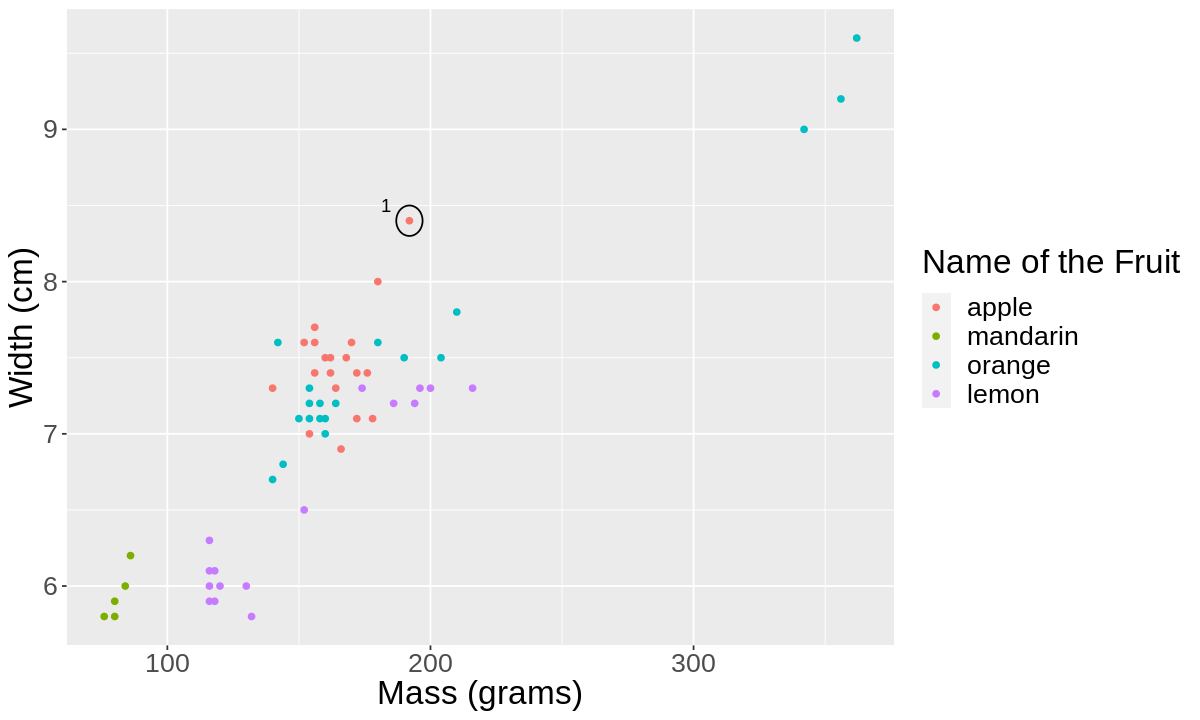

In [22]:
# Run this cell. 
options(repr.plot.width=10, repr.plot.height=6)
point1 <- c(192, 8.4)
point2 <- c(180, 8)
point44 <- c(194, 7.2)

fruit_data |>  
    ggplot(aes(x=mass, 
               y= width, 
               colour = fruit_name)) +
        labs(x = "Mass (grams)",
             y = "Width (cm)",
            colour = 'Name of the Fruit') +
        geom_point() +
        annotate("path", 
                 x=point1[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point1[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 183, y =  8.5, label = "1") +
        theme(text = element_text(size = 20))

**Question 1.1** Multiple Choice:
<br>{points: 1}

Based on the graph generated, what is the `fruit_name` of the closest data point to the one circled?

A. apple

B. lemon

C. mandarin

D. orange

*Assign your answer to an object called `answer1.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [23]:
# your code here
answer1.1 <- "A"

In [24]:
test_1.1()

Test passed 🎉
Test passed 🌈
[1] "Success!"


**Question 1.2**
<br>{points: 1}

Using `mass` and `width`, calculate the distance between the first observation and the second observation.

We provide a scaffolding to get you started.

*Assign your answer to an object called `fruit_dist_2`.*

In [26]:
 fruit_dist_2 <- fruit_data |>
    slice(1, 2) |> # We use slice to get the first two rows of the fruit dataset
    select(mass, width) |>
    dist()


In [27]:
test_1.2()

Test passed 🌈
Test passed 🌈
[1] "Success!"


**Question 1.3**
<br>{points: 1}

Calculate the distance between the first and the **44th observation** in the `fruit` dataset using the `mass` and `width` variables.

You can see from the data frame output from the cell below that **observation 44** has `mass` = 194 g and `width` = 7.2 cm.

*Assign your answer to an object called `fruit_dist_44`.*

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<int>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
4,lemon,spanish_belsan,194,7.2,10.3,0.7


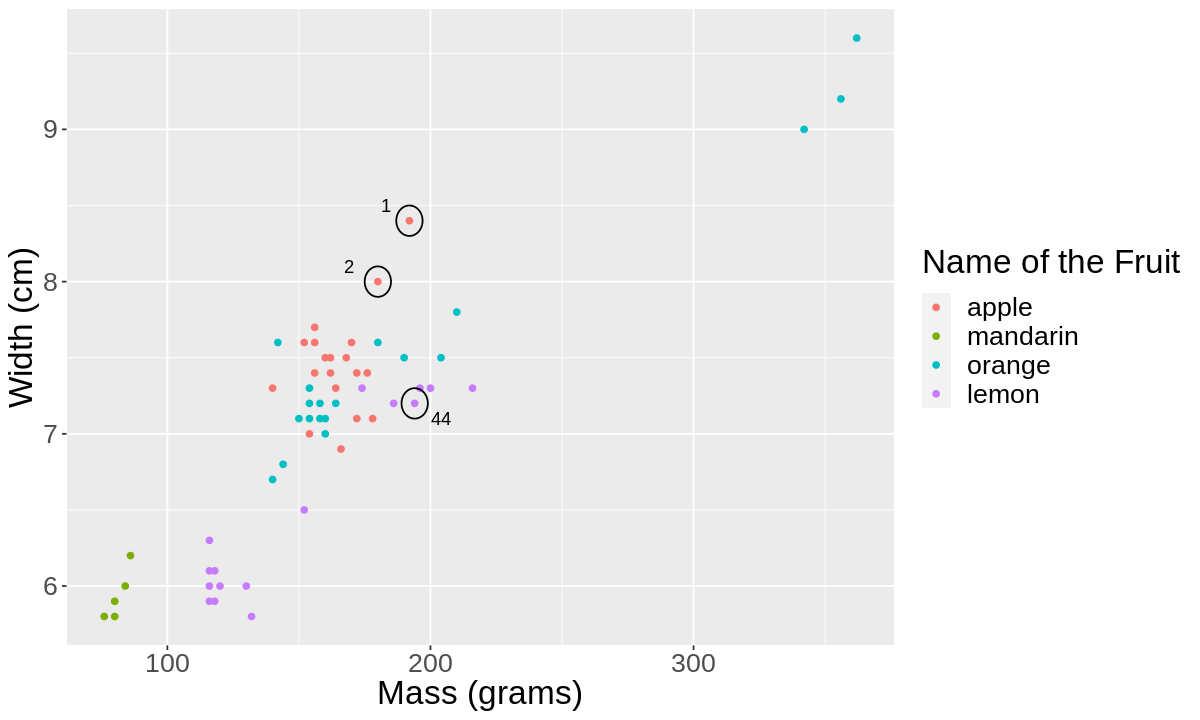

In [28]:
# Run this cell. 

filter(fruit_data, row_number() == 44)

point1 <- c(192, 8.4)
point2 <- c(180, 8)
point44 <- c(194, 7.2)

fruit_data |>
    ggplot(aes(x = mass, 
               y = width, 
               colour = fruit_name)) +
        labs(x = "Mass (grams)",
             y = "Width (cm)",
            colour = 'Name of the Fruit') +
        geom_point() +
        annotate("path", 
                 x=point1[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point1[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 183, y =  8.5, label = "1") +
        annotate("path",
                 x=point2[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point2[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 169, y =  8.1, label = "2") +
        annotate("path",
                 x=point44[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point44[2]+0.1*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 204, y =  7.1, label = "44") +
        theme(text = element_text(size = 20))

In [46]:
# your code here
fruit_dist_44 <- sqrt(sum((point1 - point44)^2))

In [47]:
test_1.3()

Test passed 🎊
Test passed 🥇
[1] "Success!"


What do you notice about your answers from **Question 1.2** & **1.3** that you just calculated? Is it what you would expect given the scatter plot above? Why or why not? Discuss this.

*Hint: Look at where the observations are on the scatterplot in the cell above this question. What might happen if we changed grams into kilograms to measure the mass?*

**Question 1.4**
<br>{points: 1}

From the distance calculation, we see that observation 1 and 44 have a smaller distance than observation 1 and 2. However, if we look at the scatterplot the distance of the first observation to the second observation appears closer than to the 44th observation.

Which of the following statements is correct?

A. A difference of 12 g in mass between observation 1 and 2 is large compared to a difference of 1.2 cm in width between observation 1 and 44. Consequently, mass will drive the classification results, and width will have less of an effect. Hence, our distance calculation reflects that.

B. If we measured mass in kilograms, then we’d get different classification results.

C. We should standardize the data so that all variables will be on a comparable scale.

D. All of the above.

*Assign your answer to an object called `answer1.4`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [41]:
# your code here
answer1.4 <- "D"

In [42]:
test_1.4()

Test passed 😸
Test passed 🌈
[1] "Success!"


**Question 1.5**
<br>{points: 1}

Scale and center all the variables of the `fruit` dataset and save them as columns in your data table.

Save the dataset object and call it `fruit_data_scaled`. Make sure to name the new columns `scaled_*` where * is the old column name (e.g. `scaled_mass`). Do not drop the unscaled columns (`mass`, `width`, `height`, `color_score`).

In [43]:
fruit_data

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<int>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
1,apple,granny_smith,176,7.4,7.2,0.60
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,lemon,unknown,116,5.9,8.1,0.73
4,lemon,unknown,152,6.5,8.5,0.72
4,lemon,unknown,118,6.1,8.1,0.70


In [44]:
 fruit_data_scaled <- fruit_data |> 
 mutate(scaled_mass = scale(mass, center = TRUE), 
        scaled_width = scale(width, center = TRUE),
        scaled_height = scale(height, center = TRUE),
        scaled_color_score = scale(color_score, center = TRUE))

fruit_data_scaled

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,scaled_mass,scaled_width,scaled_height,scaled_color_score
<int>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,apple,granny_smith,192,8.4,7.3,0.55,0.5249358,1.5850841,-0.2889166,-2.769820
1,apple,granny_smith,180,8.0,6.8,0.59,0.3068287,1.0954508,-0.6562889,-2.249376
1,apple,granny_smith,176,7.4,7.2,0.60,0.2341263,0.3610008,-0.3623910,-2.119265
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,lemon,unknown,116,5.9,8.1,0.73,-0.8564094,-1.4751241,0.2988792,-0.4278225
4,lemon,unknown,152,6.5,8.5,0.72,-0.2020880,-0.7406741,0.5927771,-0.5579334
4,lemon,unknown,118,6.1,8.1,0.70,-0.8200582,-1.2303074,0.2988792,-0.8181553


In [45]:
test_1.5()

Test passed 🌈
Test passed 😸
Test passed 😸
Test passed 🥇
Test passed 🥇
[1] "Success!"



**Question 1.6**
<br>{points: 1}

Let's repeat **Question 1.2** and **1.3** with the scaled variables:

- calculate the distance with the scaled mass and width variables between observations 1 and 2
- calculate the distances with the scaled mass and width variables between observations 1 and 44

After you do this, think about how these distances compared to the distances you computed in **Question 1.2** and **1.3** for the same points.

*Assign your answers to objects called `distance_2` and `distance_44` respectively.*

In [54]:
# your code here
distance_2 <- fruit_data_scaled |>
    slice(1,2) |>
    select(scaled_mass, scaled_width) |>
    dist()
distance_44 <- fruit_data_scaled |>
    slice(1,44) |>
    select(scaled_mass, scaled_width) |>
    dist()

In [55]:
test_1.6()

Test passed 🎉
Test passed 🎊
Test passed 🌈
Test passed 🌈
Test passed 😀
Test passed 🥳
[1] "Success!"


## Randomness and Setting Seeds

This worksheet uses functions from the `tidymodels` library, which not only allows us to perform K-nearest neighbour classification, but also allows us to evaluate how well our classification worked. In order to ensure that the steps in the worksheet are reproducible, we need to set a *seed*, i.e., a numerical "starting value," which determines the sequence of random numbers R will generate.

Below in many cells we have included a call to `set.seed`. **Do not remove these lines of code**; they are necessary to make sure the autotesting code functions properly.

> *The reason we have `set.seed` in so many places is that Jupyter notebooks are organized into cells that can be run out of order. Since things can be run out of order, the exact sequence of random values that is used in each cell is hard to determine, which makes autotesting really difficult.  We had two options: either enforce that you only ever run the code by hitting "Restart & Run All" to ensure that we get the same values of randomness each time, or put `set.seed` in a lot of places (we chose the latter). One drawback of calling `set.seed` everywhere is that the numbers that will be generated won't really be random. For the purposes of teaching and learning, that is fine here. But __in your course project and other data analyses outside of this course, you must call `set.seed` only once at the beginning of the analysis, so that your random numbers are actually reasonably random.__*

## 2. Splitting the data into a training and test set

In this exercise, we will be partitioning `fruit_data` into a training (75%) and testing (25%) set using the `tidymodels` package. After creating the test set, we will put the test set away in a lock box and not touch it again until we have found the best k-nn classifier we can make using the training set. We will use the variable `fruit_name` as our class label. 


**Question 2.0**
<br> {points: 1}

To create the training and test set, first use the `initial_split` function to split `fruit_data`. Specify you want to use *75%* of the data. For the `strata` argument, place the variable we want to classify, `fruit_name`. Name the object you create `fruit_split`. 

Next, pass the `fruit_split` object to the `training` and `testing` functions and name your respective objects `fruit_train` and `fruit_test`. 

In [56]:
# Set the seed. Don't remove this!
set.seed(3456) 

# Randomly take 75% of the data in the training set. 
# This will be proportional to the different number of fruit names in the dataset.

fruit_split <- initial_split(fruit_data, prop = 0.75, strata = fruit_name)  
fruit_train <- training(fruit_split)   
fruit_test <- testing(fruit_split)

fruit_train
fruit_test

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<int>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,176,7.4,7.2,0.60
2,mandarin,mandarin,76,5.8,4.0,0.81
⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,orange,turkey_navel,154,7.1,7.5,0.78
3,orange,turkey_navel,180,7.6,8.2,0.79
3,orange,turkey_navel,154,7.2,7.2,0.82


fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<int>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,apple,granny_smith,180,8.0,6.8,0.59
2,mandarin,mandarin,80,5.9,4.3,0.81
1,apple,braeburn,178,7.1,7.8,0.92
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,lemon,spanish_belsan,186,7.2,9.2,0.72
4,lemon,unknown,118,5.9,8.0,0.72
4,lemon,unknown,116,5.9,8.1,0.73


In [57]:
test_2.0()

Test passed 🎊
Test passed 🎉
Test passed 🥳
Test passed 🥳
Test passed 🌈
Test passed 🎊
[1] "Success!"


**Question 2.1** 
<br> {points: 1}

K-nearest neighbors is sensitive to the scale of the predictors so we should do some preprocessing to standardize them. Remember that standardizing involves centering/shifting (subtracting the mean of each variable) and scaling (dividing by its standard deviation). Also remember that standardization is *part of your training procedure*, so you can't use your test data to compute the shift / scale values for each variable. Therefore, you must pass only the training data to your recipe to compute the preprocessing steps. This ensures that our test data does not influence any aspect of our model training. Once we have created the standardization preprocessor, we can then later on apply it separately to both the training and test data sets.

For this exercise, let's see if `mass` and `color_score` can predict `fruit_name`. 

To scale and center the data, first, pass the vector and the predictors to the `recipe` function. Remember to place your vector *before* your predictors. To scale your predictors, use the `step_scale(all_predictors())` function. To center your predictors, use the `step_center(all_predictors())` function.  

*Assign your answer to an object called `fruit_recipe`.*

In [60]:
set.seed(2020) # DO NOT REMOVE

fruit_recipe <- recipe(fruit_name ~ mass + color_score , data = fruit_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

fruit_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [61]:
test_2.1()

Test passed 😀
Test passed 🥇
Test passed 🥳
Test passed 🥳
Test passed 🎉
Test passed 🥇
[1] "Success!"


**Question 2.2**
<br> {points: 1}

So far, we have split the training and testing datasets as well as preprocessed the data. Now, let's create our K-nearest neighbour classifier with only the training set using the `tidymodels` package. First, create the classifier by specifying that we want $K = 3$ neighbors and that we want to use the *straight-line* distance. 

*Assign your answer to an object called `knn_spec`*.  

Next, train the classifier with the training data set using the `workflow` function. This function allows you to bundle together your pre-processing, modeling, and post-processing requests. Scaffolding is provided below for you.

*Assign your answer to an object called `fruit_fit`*.

In [68]:
set.seed(2020) # DO NOT REMOVE

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
       set_engine("kknn") |>
       set_mode("classification")

fruit_fit <- workflow() |>
       add_recipe(fruit_recipe) |>
       add_model(knn_spec) |>
       fit(data = fruit_train)


fruit_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.09302326
Best kernel: rectangular
Best k: 3

In [69]:
test_2.2()

Test passed 🌈
Test passed 🌈
Test passed 🎊
Test passed 🎉
Test passed 😀
Test passed 😀
Test passed 🌈
Test passed 🥳
Test passed 🎉
Test passed 😀
[1] "Success!"


**Question 2.3**
<br> {points: 1}

Now that we have created our K-nearest neighbor classifier object, let's predict the class labels for our test set.

First, pass your fitted model and the **test dataset** to the `predict` function. Then, use the `bind_cols` function to add the column of predictions to the original test data. 

*Assign your answer to an object called `fruit_test_predictions`.*

In [70]:
set.seed(2020) # DO NOT REMOVE

fruit_test_predictions <- predict(fruit_fit , fruit_test) |>
       bind_cols(fruit_test)


fruit_test_predictions

.pred_class,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<fct>,<int>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
apple,1,apple,granny_smith,180,8.0,6.8,0.59
mandarin,2,mandarin,mandarin,80,5.9,4.3,0.81
apple,1,apple,braeburn,178,7.1,7.8,0.92
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
lemon,4,lemon,spanish_belsan,186,7.2,9.2,0.72
lemon,4,lemon,unknown,118,5.9,8.0,0.72
lemon,4,lemon,unknown,116,5.9,8.1,0.73


In [71]:
test_2.3()

Test passed 🌈
Test passed 🌈
Test passed 🎊
[1] "Success!"


**Question 2.4**
<br> {points: 1}

Great! We have now computed some predictions for our test datasets! From glancing at the dataframe above, it looks like most of them are correct, but wouldn't it be interesting if we could find out our classifier's accuracy? 

Thankfully, the `metrics` function from the `tidymodels` package can help us. To get the statistics about the quality of our model, you need to specify the `truth` and `estimate` arguments. In the `truth` argument, you should put the column name for the true values of the response variable. In the `estimate` argument, you should put the column name for response variable predictions. 

*Assign your answer to an object called `fruit_prediction_accuracy`.*

In [72]:
set.seed(2020) # DO NOT REMOVE

fruit_prediction_accuracy <- fruit_test_predictions |>
         metrics(truth = fruit_name, estimate = .pred_class)             


fruit_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8125000
kap,multiclass,0.7333333


In [73]:
test_2.4()

Test passed 🌈
Test passed 🌈
Test passed 🎊
Test passed 🎉
[1] "Success!"


**Question 2.5**
<br> {points: 1}

Now, let's look at the *confusion matrix* for the classifier. This will show us a table comparing the predicted labels with the true labels. 

A confusion matrix is essentially a classification matrix. The columns of the confusion matrix represent the actual class and the rows represent the predicted class (or vice versa). Shown below is an example of a confusion matrix.

|                  |          |  Actual Values |                |
|:----------------:|----------|:--------------:|:--------------:|
|                  |          |    Positive    |    Negative    |
|**Predicted Value**  | Positive |  True Positive | False Positive|
|                  | Negative | False Negative | True Negative  |


- A **true positive** is an outcome where the model correctly predicts the positive class.
- A **true negative** is an outcome where the model correctly predicts the negative class.
- A **false positive** is an outcome where the model incorrectly predicts the positive class.
- A **false negative** is an outcome where the model incorrectly predicts the negative class.

<br>

We can create a confusion matrix by using the `conf_mat` function. Similar to the `metrics` function, you will have to specify the `truth` and `estimate` arguments. 

*Assign your answer to an object called `fruit_mat`*.

In [74]:
set.seed(2020) # DO NOT REMOVE

fruit_mat <- fruit_test_predictions |> 
       conf_mat (truth = fruit_name, estimate = .pred_class)

fruit_mat

          Truth
Prediction apple mandarin orange lemon
  apple        4        0      0     0
  mandarin     0        1      0     0
  orange       0        0      3     0
  lemon        1        0      2     5

In [75]:
test_2.5()

Test passed 🌈
Test passed 🌈
Test passed 🎊
[1] "Success!"


**Question 2.6** Multiple Choice:
<br> {points: 1}

Reading `fruit_mat`, how many observations were labelled correctly?

A. 14

B. 12

C. 10

D. 13

*Assign your answer to an object called `answer2.6`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [82]:
# your code here

answer2.6 <- "D"

In [83]:
test_2.6()

Test passed 🌈
Test passed 🥳
[1] "Success!"


**Question 2.7** Multiple Choice:
<br> {points: 1}

Reading `fruit_mat`, let's suppse that we are really interested in the lemons, and treat "lemon" as being the "positive" class. What is the precision of our classifier?

*Assign your answer to an object called `answer2.7`.*

In [124]:
# your code here
answer2.7 <- 5/8

In [125]:
test_2.7()

Test passed 😀
Test passed 🎉
[1] "Success!"


**Question 2.8** Multiple Choice:
<br> {points: 1}

Again, let us treat "lemon" as being the "positive" class. What is the recall of our classifier?

*Assign your answer to an object called `answer2.8`.*

In [133]:
# your code here
answer2.8 <- 1

In [134]:
test_2.8()

Test passed 🎊
Test passed 🥳
[1] "Success!"


### 3. Cross-validation

**Question 3.1**
<br> {points: 1}

The vast majority of predictive models in statistics and machine learning have parameters that you have to pick. For the past few exercises, we have had to pick the number of neighbours for the class vote, which we have done arbitraily. But, is it possible to make this selection, *i.e., tune the model, in a principled way?* Ideally, we want to pick the number of neighborurs to maximize the performance of our classifier on data *it hasn’t seen yet*.

An important aspect of the tuning process is that we can, if we want to, split our training data again, train and evaluate a classifier for each split, and then choose the parameter based on all of the different results. If we just split our training data once, our best parameter choice will depend strongly on the randomness from how this single split was made. Using multiple different splits, we’ll get a more robust estimate of accuracy, which will lead to a more suitable choice of the number of neighbours $K$ to perform well on unseen data.

The idea of training and evaluating models on multiple training data splits times is called "cross-validation". In cross-validation, we split our overall training data into $C$ evenly-sized chunks, and then iteratively use 1 chunk as the **validation set** and combine the remaining $C−1$ chunks as the **training set.** The validation set is used in a similar was as the test set, **except** that the test set is only used once at the end to report model performance whether we use model performance on the validation set to select the model during cross-validation. 

---

We can perform a cross-validation in R using the `vfold_cv` function. To use this function, you have to identify the training set as well as specify the `v` (the number of folds) and the `strata` argument (the label variable). 

For this exercise, perform **$5$-fold cross-validation**.

*Assign your answer to an object called `fruit_vfold`*.

In [97]:
set.seed(2020) # DO NOT REMOVE

fruit_vfold <- vfold_cv(fruit_train, v = 5, strata = fruit_name)


In [95]:
test_3.1()

Test passed 😀
Test passed 🥇
Test passed 😸
Test passed 😀
Test passed 🥇
Test passed 😸
[1] "Success!"


**Question 3.2**
<br> {points: 1}

Now perform the workflow analysis again. You can reuse the `fruit_recipe` and `knn_spec` objects you made earlier. When you are fitting the knn model, use the `fit_resamples` function instead of the `fit` function for training. This function will allow us to run a cross-validation on each train/validation split we created in the previous question. 

*Assign your answer to an object called `fruit_resample_fit`*.

In [99]:
set.seed(2020) # DO NOT REMOVE

fruit_resample_fit <- workflow() |>
       add_recipe(fruit_recipe) |>
       add_model(knn_spec) |>
       fit_resamples(resamples = fruit_vfold)


→ A | warning: No observations were detected in `truth` for level(s): 'mandarin'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x3





In [100]:
test_3.2()

Test passed 😸
Test passed 🥳
Test passed 🌈
Test passed 😸
Test passed 🎉
Test passed 🎊
[1] "Success!"


**Question 3.3** 
<br> {points: 1}

Now that we have ran a cross-validation on each train/validation split, one has to ask, how accurate was the classifier's validation across the folds? We can aggregate the *mean* and *standard error* by using the `collect_metrics` function. The standard error is essentially a measure of how uncertain we are in the mean value. 

Use the `collect_metrics` function on the `fruit_resample_fit` object and assign your answer to an object called `fruit_metrics`.

In [101]:
# your code here
fruit_metrics <- fruit_resample_fit |>
    collect_metrics()
fruit_metrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.8827778,5,0.039853125,Preprocessor1_Model1
roc_auc,hand_till,0.9620370,5,0.009945625,Preprocessor1_Model1


In [102]:
test_3.3()

Test passed 🎊
Test passed 😀
[1] "Success!"


## 4. Parameter value selection

Using a 5-fold cross-validation, we have established a prediction accuracy for our classifier. 

If we had to improve our classifier, we have to change the parameter: number of neighbours, $K$. Since cross-validation helps us evaluate the accuracy of our classifier, we can use cross-validation to calculate an accuracy for each value of $K$ in a reasonable range, and then pick the value of $K$ that gives us the best accuracy. 

The great thing about the `tidymodels` package is that it provides a very simple syntax for tuning models. Using `tune()`, each parameter in the model can be adjusted rather than given a specific value. 

**Question 4.0**
<br> {points: 1}

Create a new K-nearest neighbor model specification but instead of specifying a particular value for the `neighbors` argument, insert `tune()`. 

*Assign your answer to an object called `knn_tune`.* 

In [105]:
set.seed(2020) # DO NOT REMOVE
knn_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [106]:
test_4.0()

Test passed 🌈
Test passed 🌈
Test passed 🎊
Test passed 🎉
Test passed 😀
Test passed 😀
[1] "Success!"


**Question 4.1**
<br>{points: 1}

Now, create a `workflow()` analysis that combines `fruit_recipe` and our new `knn_tune` model specification. 

Instead of using `fit` or `fit_resamples`, we will use the `tune_grid` function to fit the model for each value in a range of parameter values. For the `resamples` argument, input the cross-validation `fruit_vfold` model we created earlier. The `grid` argument specifies that the tuning should try $X$ amount of values of the number of neighbors $K$ when tuning. For this exercise, use *10 $K$ values when tuning*. 

Finally, aggregate the mean and standard error by using the `collect_metrics` function.

*Assign your answer to an object called `knn_results`.*

In [107]:
set.seed(1234) # set the seed, don't remove this

knn_results <- workflow() |>
       add_recipe(fruit_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = fruit_vfold, grid = 10) |>
       collect_metrics()


knn_results

→ A | warning: No observations were detected in `truth` for level(s): 'mandarin'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x3





neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.8827778,5,0.03985313,Preprocessor1_Model01
2,roc_auc,hand_till,0.9421296,5,0.02232327,Preprocessor1_Model01
3,accuracy,multiclass,0.8827778,5,0.03985313,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,roc_auc,hand_till,0.8960648,5,0.03687828,Preprocessor1_Model09
14,accuracy,multiclass,0.6088889,5,0.04876088,Preprocessor1_Model10
14,roc_auc,hand_till,0.8743056,5,0.03734608,Preprocessor1_Model10


In [109]:
test_4.1()

Test passed 🥇
Test passed 🥳
Test passed 🎉
Test passed 🥇
[1] "Success!"


**Question 4.2**
<br>{points: 1} 


Now, let's find the best value of the number of neighbors. 

First, from `knn_results`, filter for `accuracy` from the `.metric` column. 

*Assign your answer to an object called `accuracies`.*

Next, create a line plot using the `accuracies` dataset with `neighbors` on the x-axis and the `mean` on the y-axis. 

*Assign your answer to an object called `accuracy_versus_k`.*

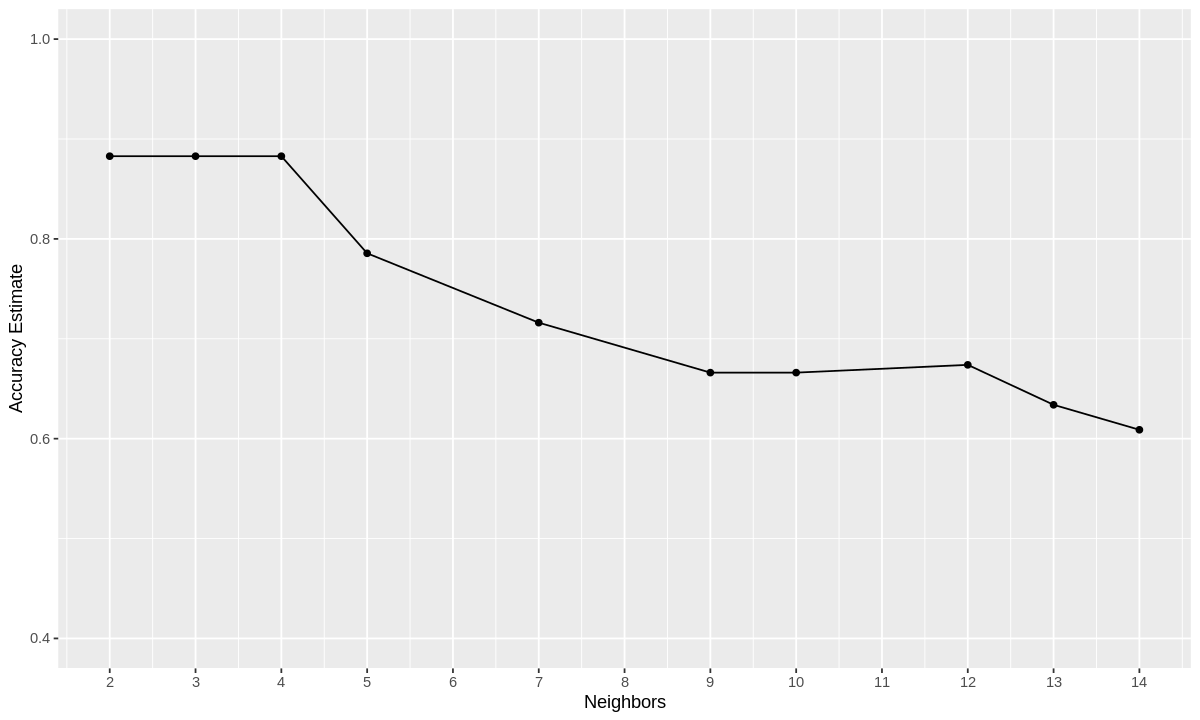

In [111]:
accuracies <- knn_results |> 
       filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis


accuracy_versus_k

In [113]:
test_4.2()

Test passed 🎉
Test passed 🥳
Test passed 😀
Test passed 😸
Test passed 🌈
Test passed 😸
[1] "Success!"


From the plot above, we can see that $K = 2$, $3$, or $4$ provides the highest accuracy. Larger $K$ values result in a reduced accuracy estimate. Remember: the values you see on this plot are estimates of the true accuracy of our classifier. Although the $K = 2$, $3$ or $4$ value is higher than the others on this plot, that doesn’t mean the classifier is necessarily more accurate with this parameter value! 

Great, now you have completed a full workflow analysis with cross-validation using the `tidymodels` package! For your information, we can choose any number of folds and typically, the more we use the better our accuracy estimate will be (lower standard error). However, more folds would mean a greater computation time. In practice, $C$ is chosen to be either 5 or 10. 

In [ ]:
source('cleanup.R')